In [223]:
from local_functions import *
import geopandas as gpd
import pandas as pd
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as cx
from shapely.geometry import Point, LineString

In [42]:
residential = get_residential(2024)
healthcare = get_healthcare(2024)
public_transport = get_public_transport(2024)
schools = get_schools(2024)
shops = get_shops(2024)

Skipping field nodes: unsupported OGR type: 13
Skipping field nodes: unsupported OGR type: 13
Skipping field nodes: unsupported OGR type: 13
Skipping field nodes: unsupported OGR type: 13
Skipping field nodes: unsupported OGR type: 13


In [194]:
residential["street"] = residential.tags.apply(lambda t: t.get('addr:street', "none"))
residential["city"] = residential.tags.apply(lambda t: t.get('addr:city', "none"))
residential["housenumber"] = residential.tags.apply(lambda t: t.get("addr:housenumber", "none"))
residential["label"] = residential["city"]+", "+residential["street"] + " " + residential["housenumber"]

In [225]:
blaumana_9 = residential[residential.id == 161422081][["id", "geometry", "label"]].reset_index(drop=True)
blaumana_9["node_type"] = "House"

closest_doctor = (
    blaumana_9
    .sjoin_nearest(healthcare[healthcare.amenity == "doctors"], how="left", distance_col="distance")
    [["id_right", "distance"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(healthcare, on="id", how="left")
)
closest_doctor["label"] = closest_doctor.tags.apply(lambda t: t.get("name", "none"))
closest_doctor = closest_doctor[["id", "geometry", "label", "distance"]]
closest_doctor["node_type"] = "healthcare"

In [196]:
closest_clinic = (
    blaumana_9
    .sjoin_nearest(healthcare[healthcare.amenity == "clinic"], how="left", distance_col="distance")
    [["id_right", "distance"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(healthcare, on="id", how="left")
)
closest_clinic["label"] = closest_clinic.tags.apply(lambda t: t.get("name", "none"))
closest_clinic = closest_clinic[["id", "geometry", "label", "distance"]]
closest_clinic["node_type"] = "healthcare"

In [197]:
closest_hospital = (
    blaumana_9
    .sjoin_nearest(healthcare[healthcare.amenity == "hospital"], how="left", distance_col="distance")
    [["id_right", "distance"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(healthcare, on="id", how="left")
)
closest_hospital["label"] = closest_hospital.tags.apply(lambda t: t.get("name", "none"))
closest_hospital = closest_hospital[["id", "geometry", "label", "distance"]]
closest_hospital["node_type"] = "healthcare"

In [198]:
closest_school = (
    blaumana_9
    .sjoin_nearest(schools[schools.amenity == "school"], how="left", distance_col="distance")
    [["id_right", "distance"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(schools, on="id", how="left")
)
closest_school["label"] = closest_school.tags.apply(lambda t: t.get("name", "none"))
closest_school = closest_school[["id", "geometry", "label", "distance"]]
closest_school["node_type"] = "school"

In [199]:
closest_kindergarten = (
    blaumana_9
    .sjoin_nearest(schools[schools.amenity == "kindergarten"], how="left", distance_col="distance")
    [["id_right", "distance"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(schools, on="id", how="left")
)
closest_kindergarten["label"] = closest_kindergarten.tags.apply(lambda t: t.get("name", "none"))
closest_kindergarten = closest_kindergarten[["id", "geometry", "label", "distance"]]
closest_kindergarten["node_type"] = "school"

In [200]:
closest_shop = (
    blaumana_9
    .sjoin_nearest(shops, how="left", distance_col="distance")
    [["id_right", "distance"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(shops, on="id", how="left")
)
closest_shop["label"] = closest_shop.tags.apply(lambda t: t.get("name", "none"))
closest_shop = closest_shop[["id", "geometry", "label", "distance"]]
closest_shop["node_type"] = "shop"

In [201]:
closest_public_transport = (
    blaumana_9
    .sjoin(public_transport, how="left", predicate="dwithin", distance=100)
    [["id_right"]]
    .rename(columns={"id_right": "id"})
    .reset_index(drop=True)
    .merge(public_transport, on="id", how="left")
)
closest_public_transport["label"] = closest_public_transport.tags.apply(lambda t: t.get("name", "none")) + "\n (Trolejbusa pitura)"
closest_public_transport = closest_public_transport[["id", "geometry", "label"]]
closest_public_transport["node_type"] = "public transport"

In [202]:
closest_public_transport

,id,geometry,label,node_type
0,257809060,POINT (507452.457 312299.764),Blaumaņa iela\n (Trolejbusa pitura),public transport
1,3025685827,POINT (507553.412 312359.266),Tērbatas iela\n (Trolejbusa pitura),public transport
2,1437604876,POINT (507504.537 312361.76),Lāčplēša iela\n (Trolejbusa pitura),public transport
3,3025685828,POINT (507526.234 312404.767),Tērbatas iela\n (Trolejbusa pitura),public transport


In [210]:
shapes = pd.concat([blaumana_9, closest_doctor, closest_clinic, closest_public_transport, closest_school, closest_kindergarten, closest_shop])

In [211]:
xlim = [shapes.total_bounds[0]-70, shapes.total_bounds[2]+70]
ylim = [shapes.total_bounds[1]-70, shapes.total_bounds[3]+70]

In [217]:
polygons

,id,geometry,label,node_type,distance
68638,161422081,"POLYGON ((507500.61 312296.768, 507500.72 3122...","Rīga, Blaumaņa iela 9",House,NaN
0,129820725,"POLYGON ((507430.426 312303.777, 507429.758 31...",Rīgas 40. vidusskola,school,70.519044
0,383590608,"POLYGON ((507480.232 312449.967, 507441.095 31...",Rīgas 200. pirmsskolas izglītības iestāde,school,149.056548
0,160913763,"POLYGON ((507404.715 312356.071, 507402.054 31...",Galerija Rīga,shop,112.751000


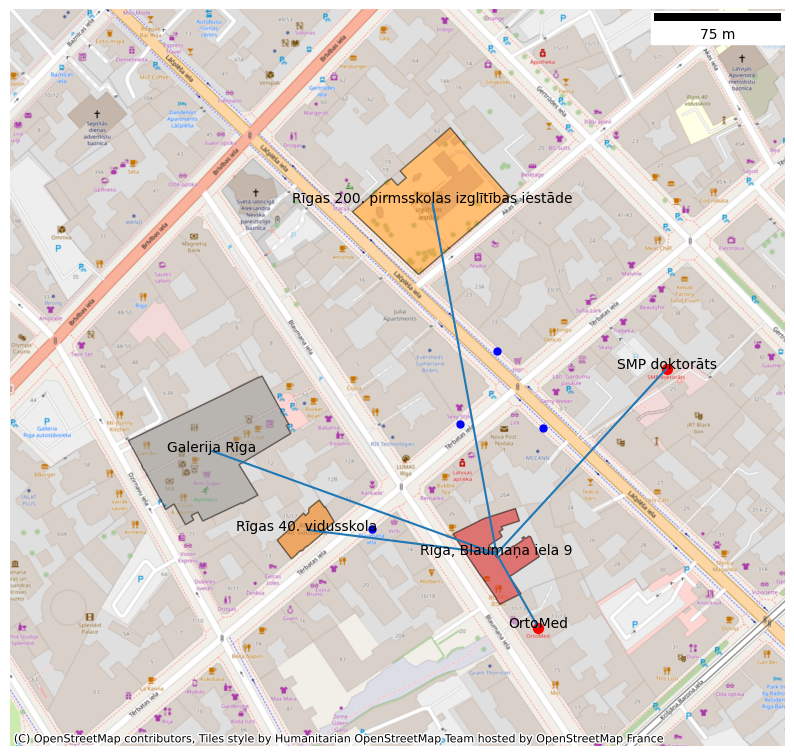

In [237]:
polygons = shapes[shapes.geometry.geom_type == 'Polygon']
points = shapes[shapes.geometry.geom_type == "Point"]

ax = polygons.plot(alpha=0.5, edgecolor="black", figsize=(10, 10), column="node_type", cmap="Set1")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
points[points.node_type == "healthcare"].plot(ax=ax, marker="o", color="red", markersize=50)
points[points.node_type == "public transport"].plot(ax=ax, marker="o", color="blue", markersize=25)
cx.add_basemap(ax, crs=shapes.crs, zoom=18)
ax.set_axis_off()
ax.add_artist(ScaleBar(1))
polygons.apply(lambda x: ax.annotate(text=x['label'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
points[points.node_type == "healthcare"].apply(lambda x: ax.annotate(text=x['label'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

lines_to = pd.concat([closest_doctor, closest_clinic, closest_kindergarten, closest_shop, closest_school]).reset_index(drop=True)

for i in range(lines_to.shape[0]):
    node = lines_to.iloc[i]
    line = LineString([[node.geometry.centroid.x, node.geometry.centroid.y], [blaumana_9.geometry[0].centroid.x, blaumana_9.geometry[0].centroid.y]])
    line = gpd.GeoDataFrame([line], columns=["geometry"], geometry="geometry")
    line.plot(ax=ax)

In [236]:
lines_to

,id,geometry,label,distance,node_type,0
0,2.826423e+09,POINT (507626.619 312394.386),SMP doktorāts,121.628052,healthcare,NaN
1,9.939467e+09,POINT (507550.889 312241.491),OrtoMed,22.431137,healthcare,NaN
2,3.835906e+08,"POLYGON ((507480.232 312449.967, 507441.095 31...",Rīgas 200. pirmsskolas izglītības iestāde,149.056548,school,NaN
3,1.609138e+08,"POLYGON ((507404.715 312356.071, 507402.054 31...",Galerija Rīga,112.751000,shop,NaN
4,1.298207e+08,"POLYGON ((507430.426 312303.777, 507429.758 31...",Rīgas 40. vidusskola,70.519044,school,NaN
5,NaN,None,NaN,NaN,NaN,257809060
6,NaN,None,NaN,NaN,NaN,POINT (507452.45735413715 312299.76438056026)
7,NaN,None,NaN,NaN,NaN,Blaumaņa iela\n (Trolejbusa pitura)
8,NaN,None,NaN,NaN,NaN,public transport
